In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Appu.csv')

In [3]:
bands = ['Theta', 'Alpha', 'BetaL', 'BetaH', 'Gamma']

In [4]:
band_avg = pd.DataFrame(columns=bands)

In [5]:
for trait, group in df.groupby('Personality'):
    row = {}
    for band in bands:
        band_cols = [col for col in df.columns if f".{band}" in col]
        row[band] = group[band_cols].mean().mean()  # Mean across columns and rows
    band_avg.loc[trait] = row

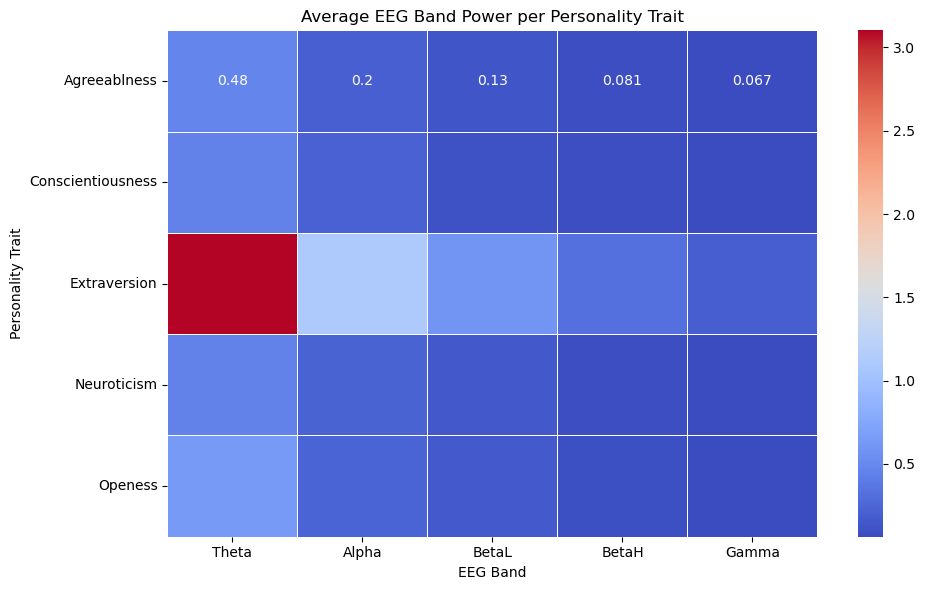

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(band_avg.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Average EEG Band Power per Personality Trait')
plt.xlabel('EEG Band')
plt.ylabel('Personality Trait')
plt.tight_layout()
plt.show()

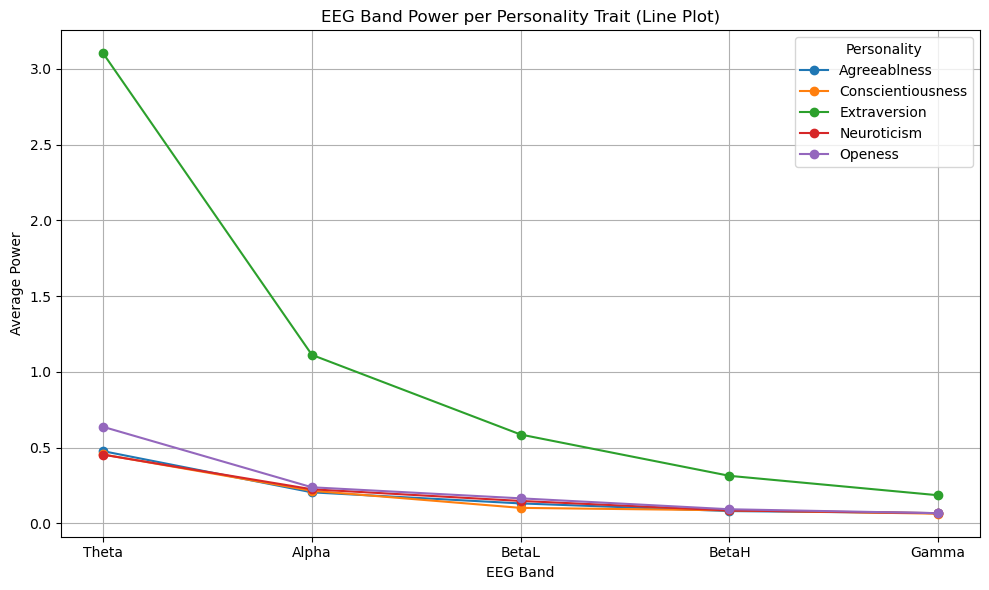

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for trait in band_avg.index:
    plt.plot(band_avg.columns, band_avg.loc[trait], marker='o', label=trait)

plt.title('EEG Band Power per Personality Trait (Line Plot)')
plt.xlabel('EEG Band')
plt.ylabel('Average Power')
plt.legend(title='Personality')
plt.grid(True)
plt.tight_layout()
plt.show()


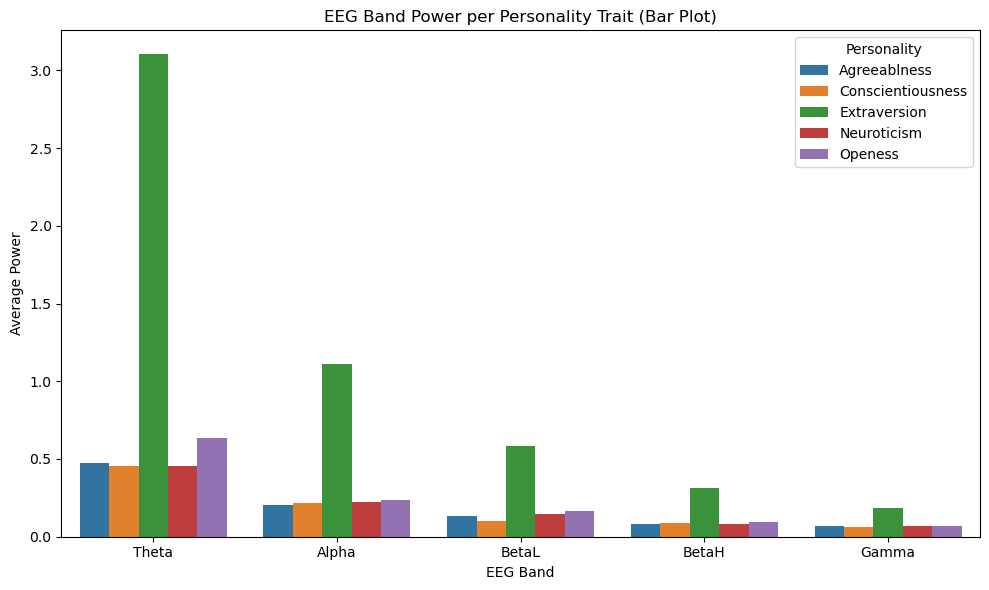

In [8]:
import seaborn as sns

band_avg_reset = band_avg.reset_index().melt(id_vars='index', var_name='Band', value_name='Power')
band_avg_reset.rename(columns={'index': 'Personality'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=band_avg_reset, x='Band', y='Power', hue='Personality')
plt.title('EEG Band Power per Personality Trait (Bar Plot)')
plt.xlabel('EEG Band')
plt.ylabel('Average Power')
plt.legend(title='Personality')
plt.tight_layout()
plt.show()
